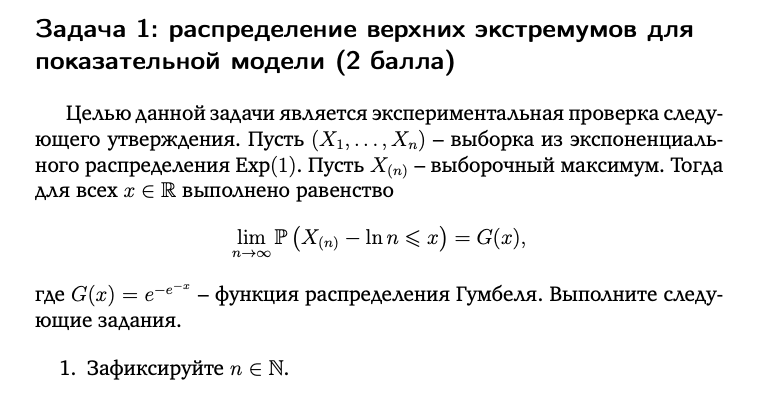

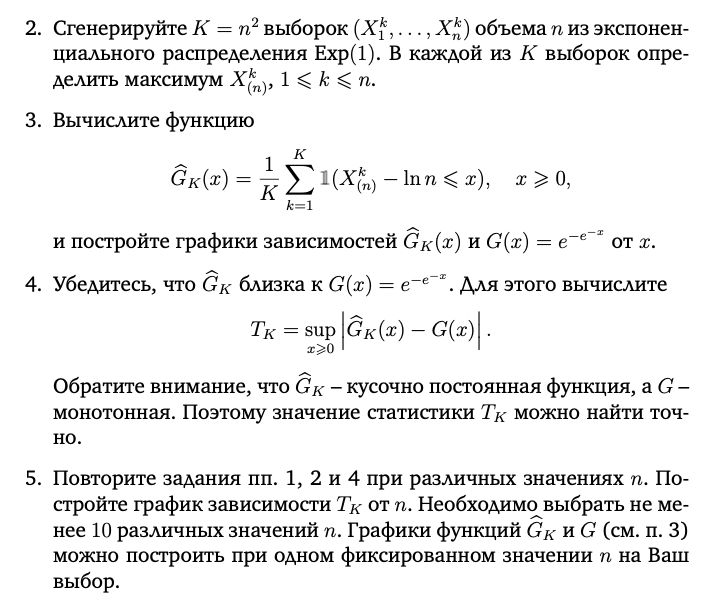

In [ ]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt


def G_K(x):
    sum = 0
    for k in range(K):
        sum += (X_max_n[k] - np.log(n) <= x)
    return sum / K


G = lambda x: np.exp(-np.exp(-x))

n_list = np.arange(10, 500, 20)
T_list = []

G_hat_K_graph=[]

x_for_G = np.linspace(0, 5, num=50)

Gumbel_dist = []
for x in x_for_G:
    Gumbel_dist.append(G(x))

for i in range(len(n_list)):
    n = n_list[i]
    K = n ** 2

    X_sample = [[]] * K
    X_max_n = [0] * K
    for j in range(K):
        X_sample[j] = sps.expon.rvs(size=n)
        X_max_n[j] = sps.tmax(X_sample[j])


    G_hat_K = []

    for x in x_for_G:
        G_hat_K.append(G_K(x))

    T_list.append(max(list(map(abs, np.array(G_hat_K) - np.array(Gumbel_dist)))))
    if i==len(n_list)-1:
        G_hat_K_graph=G_hat_K

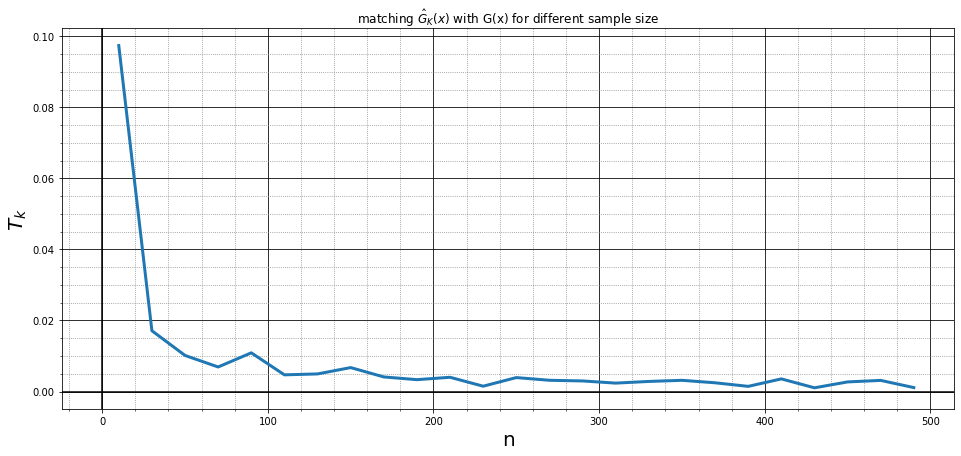

In [ ]:
plt.figure(figsize=(16, 7))
ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(which='major',color = 'k')
ax.minorticks_on()
ax.grid(which='minor',color = 'gray',linestyle = ':')
plt.xlabel('n',size=20)
plt.ylabel('$T_k$',size=20)
plt.title('matching $\hat{G}_K(x)$ with G(x) for different sample size')
plt.plot(n_list, T_list,linewidth=3)
plt.show()

что видим? чем больше выборка, тем $\hat G_K$ ближе к $G$. кто бы мог подумать...

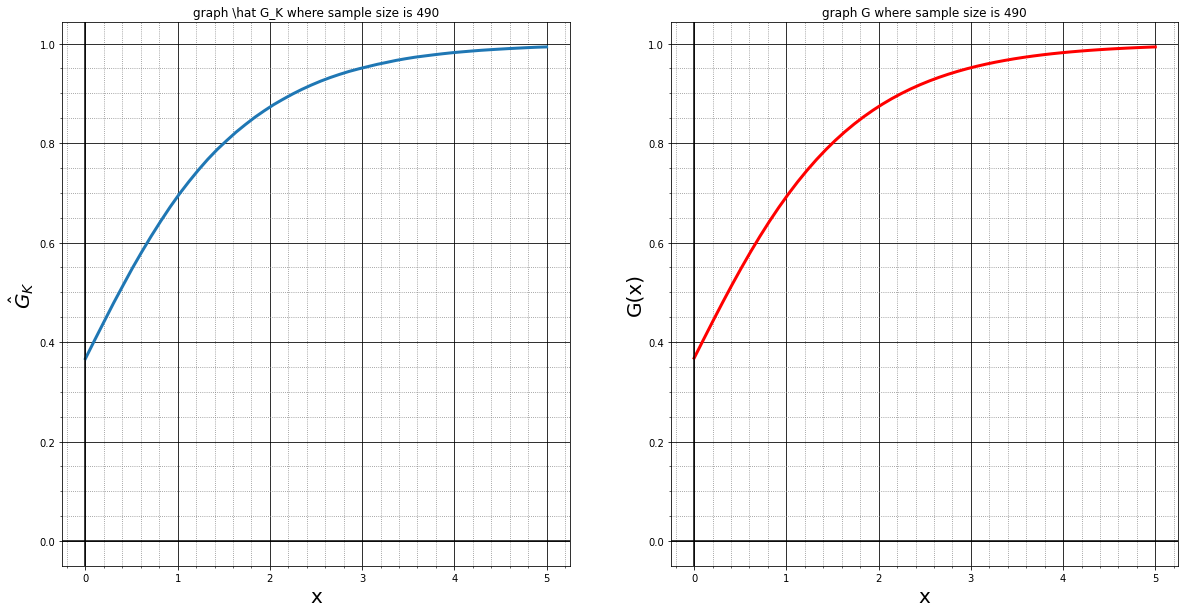

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('graph \hat G_K where sample size is 490')
plt.plot(x_for_G, G_hat_K_graph,linewidth=3)
plt.xlabel('x',size=20)
plt.ylabel('$\hat{G}_K$',size=20)
ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(which='major',color = 'k')
ax.minorticks_on()
ax.grid(which='minor',color = 'gray',linestyle = ':')
plt.subplot(1, 2, 2)
plt.title('graph G where sample size is 490')
plt.plot(x_for_G, Gumbel_dist,linewidth=3,c='r')
plt.xlabel('x',size=20)
plt.ylabel('G(x)',size=20)
ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(which='major',color = 'k')
ax.minorticks_on()
ax.grid(which='minor',color = 'gray',linestyle = ':')
plt.show()

как видно, для размера выборки 490, графики как будто идентичны

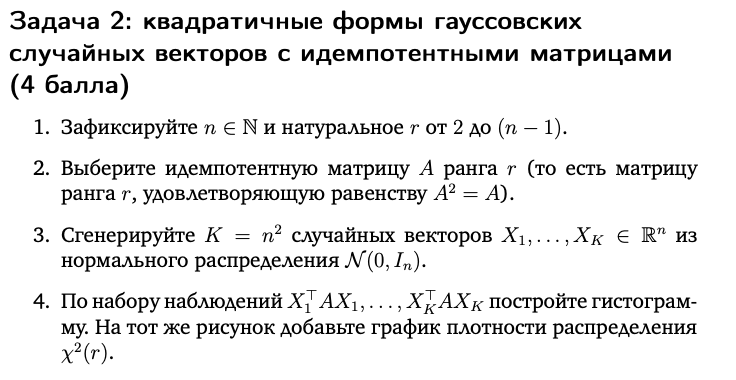

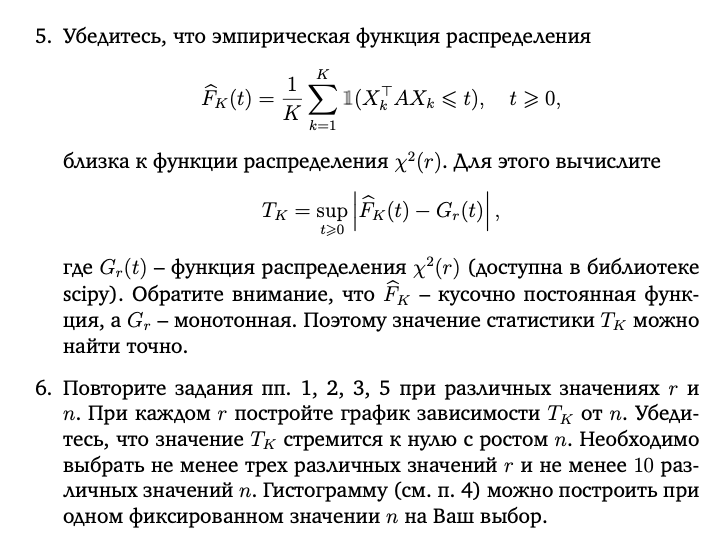

In [ ]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import random

def Emperical_dist_func(t):
    sum = 0
    for xax in new_sample:
        sum += (xax <= t)
    return sum / K

n_list = np.arange(10, 510, 20)
r_list = [9,134,259,384]


t_for_F = np.arange(0, 5, 0.1)

T_2_list = []

sample_for_graph=[]


for r in r_list:
    T_2 = []
    for n in n_list:
        if n>r:
            X = np.random.randint(1, 10, size=(n, r))
            A = X @ np.linalg.inv(X.T @ X) @ X.T
            K = n ** 2
            X_sample = sps.multivariate_normal(mean=[0] * n, cov=np.eye(n)).rvs(size=K)
            new_sample = []
            for i in range(len(X_sample)):
                new_sample.append(np.array(X_sample[i]).T @ A @ np.array(X_sample[i]))
            F_k = []
            for t in t_for_F:
                F_k.append(Emperical_dist_func(t))
            G_r = sps.chi2(df=r).cdf(t_for_F)
            T_2.append(max(list(map(abs, np.array(F_k) - np.array(G_r)))))
            if n==70 and r==9:
                sample_for_graph=new_sample
    T_2_list.append(T_2)

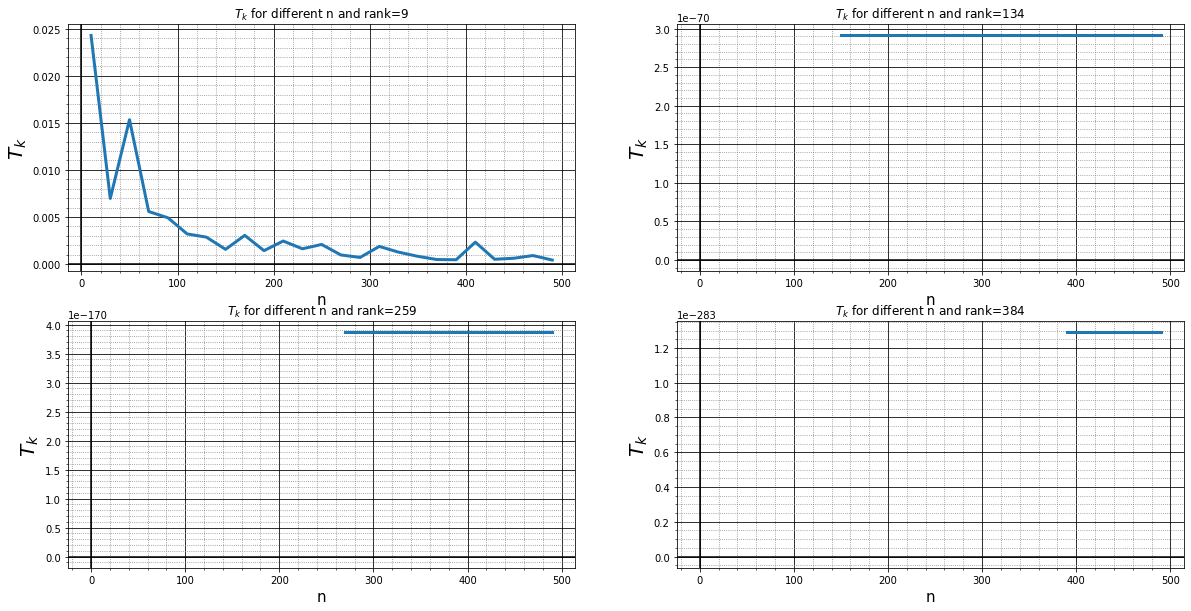

In [ ]:
plt.figure(figsize=(20, 10))

ncol=2
nrow=int(np.ceil(len(r_list)/2))

for i in range(len(r_list)):
    j=0
    while n_list[j]<=r_list[i]:
        j+=1
    plt.subplot(nrow, ncol, i+1)
    plt.title(f'$T_k$ for different n and rank={r_list[i]}')
    plt.plot(n_list[j:], T_2_list[i], linewidth=3)
    plt.xlabel('n', size=15)
    plt.ylabel('$T_k$', size=20)
    ax = plt.gca()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.grid(which='major', color='k')
    ax.minorticks_on()
    ax.grid(which='minor', color='gray', linestyle=':')

plt.show()

то есть, чем больше ранг, тем ближе эмперическая функция к функции распределения $\chi^2(r)$

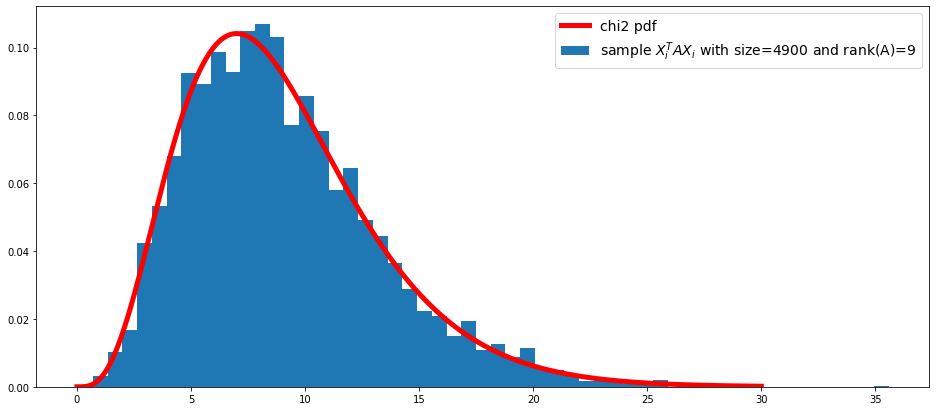

In [ ]:
plt.figure(figsize=(16, 7))
plt.hist(sample_for_graph, bins='auto', density=True,
         alpha=1, label=f'sample $X_i^TAX_i$ with size={70**2} and rank(A)=9')
grid = np.linspace(0, 30, 10001)
plt.plot(grid, sps.chi2(df=9).pdf(grid), lw=5,color='red', label='chi2 pdf')
plt.legend(fontsize=14, loc=1)
plt.show()

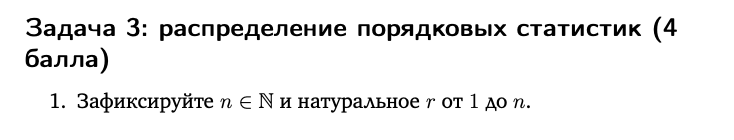

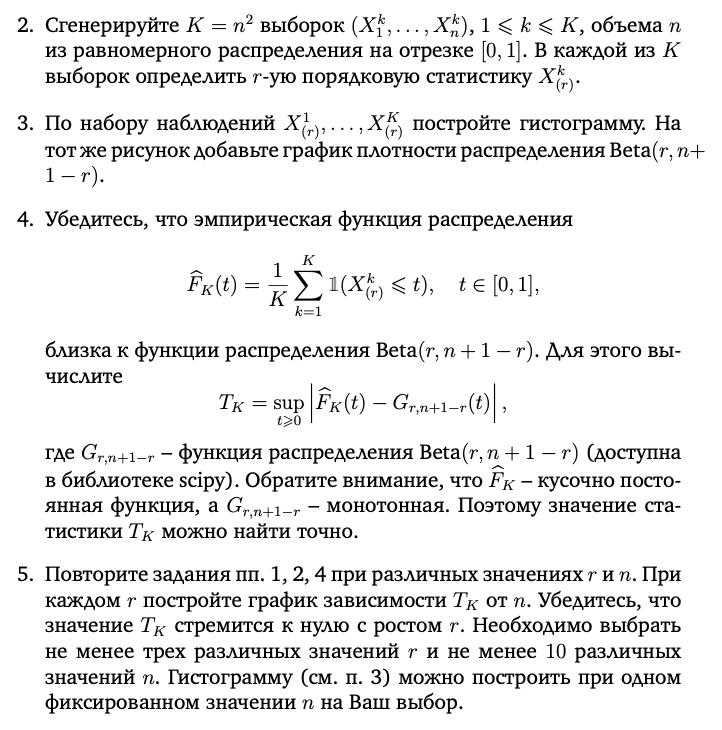

In [ ]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import random


def Emperical_dist_func_2(y):
    sum = 0
    for x in X_r_order_stat:
        sum += (x <= y)
    return sum / K


n_list2 = np.arange(10, 510, 20)
r_list2 = [9, 134, 259, 384]

y_for_F = np.linspace(0, 1, num=100)


T_3_list = []

sample_for_graph_2 = []

for r in r_list2:
    T_2 = []
    for n in n_list2:
        if n > r:
            K = n ** 2
            X_r_order_stat = []
            for i in range(K):
                X_r_order_stat.append(np.partition(np.asarray(sps.uniform.rvs(size=n)), r)[r])
            F_k2 = []
            for y in y_for_F:
                F_k2.append(Emperical_dist_func_2(y))
            G_beta = sps.beta(a=r, b=n + 1 - r).cdf(y_for_F)
            T_2.append(max(list(map(abs, np.array(G_beta) - np.array(F_k2)))))
            if n == 70 and r == 9:
                sample_for_graph_2 = X_r_order_stat
    T_3_list.append(T_2)

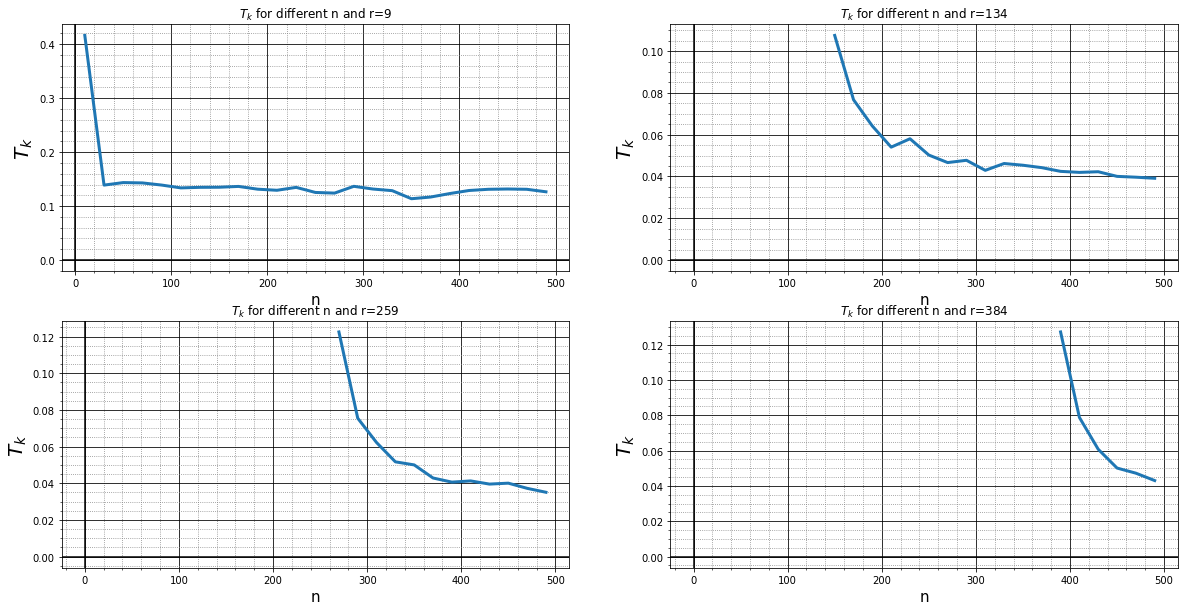

In [ ]:
plt.figure(figsize=(20, 10))

ncol = 2
nrow = int(np.ceil(len(r_list2) / 2))

for i in range(len(r_list2)):
    j = 0
    while n_list2[j] <= r_list2[i]:
        j += 1
    plt.subplot(nrow, ncol, i + 1)
    plt.title(f'$T_k$ for different n and r={r_list2[i]}')
    plt.plot(n_list2[j:], T_3_list[i], linewidth=3)
    plt.xlabel('n', size=15)
    plt.ylabel('$T_k$', size=20)
    ax = plt.gca()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.grid(which='major', color='k')
    ax.minorticks_on()
    ax.grid(which='minor', color='gray', linestyle=':')
plt.show()

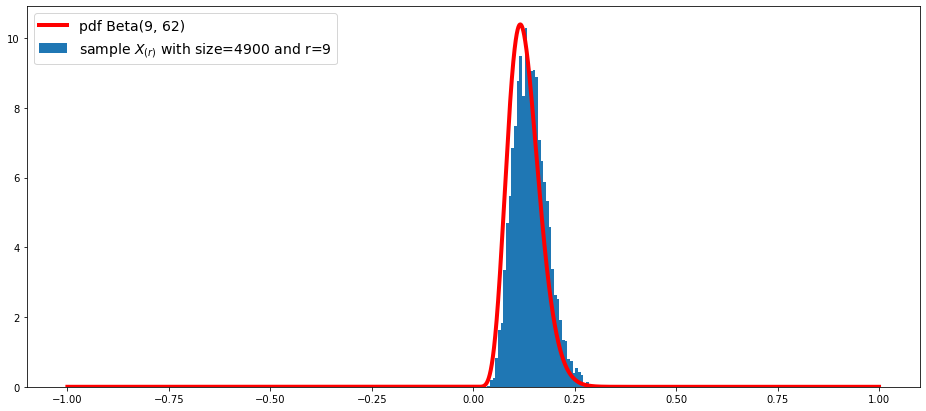

In [ ]:
plt.figure(figsize=(16, 7))
plt.hist(sample_for_graph_2, bins='auto', density=True,
         alpha=1, label='sample $X_{(r)}$ with size=4900 and r=9')
grid = np.linspace(-1, 1, 10001)
plt.plot(grid, sps.beta(a=9, b=70 + 1 - 9).pdf(grid), color='red', lw=4,
         label=f'pdf Beta({9}, {70 + 1 - 9})')
plt.legend(fontsize=14, loc=2)
plt.show()